<a href="https://colab.research.google.com/github/bajpaidevharsh/AI-ML/blob/main/Financial_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [9]:
dev=pandas.read_csv('/content/data.csv')

In [10]:
dev.head(5)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [11]:
dev.Sentiment.value_counts()

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

In [12]:
dev.head(5)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [13]:
dev.columns

Index(['Sentence', 'Sentiment'], dtype='object')

In [14]:
import tensorflow

In [15]:
dev.Sentiment.value_counts()

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

In [16]:
lt=[]
for i in dev.Sentiment:
  if i=='positive':
    lt.append(0)
  elif i=='negative':
    lt.append(1)
  else:
    lt.append(2)

In [17]:
dev['sentiment_new']=lt

In [18]:
dev.head(5)

,Sentence,Sentiment,sentiment_new
0,The GeoSolutions technology will leverage Bene...,positive,0
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,1
2,"For the last quarter of 2010 , Componenta 's n...",positive,0
3,According to the Finnish-Russian Chamber of Co...,neutral,2
4,The Swedish buyout firm has sold its remaining...,neutral,2


In [19]:
t=[]

In [20]:
count=0
for i in dev.Sentence:
  count+=len(i.split())
print(count)

122710


In [21]:
len(dev.Sentence)

5842

In [22]:
122710/5842

21.004792879150976

In [23]:
txt_vector=tensorflow.keras.layers.TextVectorization(max_tokens=12271,output_sequence_length=22)

In [24]:
txt_vector.adapt(dev.Sentence)

In [25]:
emb=tensorflow.keras.layers.Embedding(input_dim=12271,output_dim=128)

**creating the model**

In [26]:
input=tensorflow.keras.layers.Input(shape=(1,),dtype=tensorflow.string)

In [27]:
x=txt_vector(input)

In [28]:
x=emb(x)

In [29]:
x=tensorflow.keras.layers.GlobalAveragePooling1D()(x)

In [30]:
output=tensorflow.keras.layers.Dense(3,activation='softmax')(x)

In [31]:
model=tensorflow.keras.Model(input,output)

**compiling the model**

In [33]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(),loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

**spilitting the data**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(dev.Sentence,dev.sentiment_new,test_size=0.2)

**fitting the data**

In [39]:
history=model.fit(xtrain,ytrain,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
147/147 [==============================] - 3s 24ms/step - loss: 0.1976 - accuracy: 0.8954 - val_loss: 0.7991 - val_accuracy: 0.6895
Epoch 2/10
147/147 [==============================] - 4s 29ms/step - loss: 0.1840 - accuracy: 0.9041 - val_loss: 0.8280 - val_accuracy: 0.6955
Epoch 3/10
147/147 [==============================] - 3s 22ms/step - loss: 0.1738 - accuracy: 0.8986 - val_loss: 0.8579 - val_accuracy: 0.6826
Epoch 4/10
147/147 [==============================] - 3s 23ms/step - loss: 0.1659 - accuracy: 0.9016 - val_loss: 0.8818 - val_accuracy: 0.6835
Epoch 5/10
147/147 [==============================] - 4s 26ms/step - loss: 0.1588 - accuracy: 0.8999 - val_loss: 0.9094 - val_accuracy: 0.6886
Epoch 6/10
147/147 [==============================] - 6s 38ms/step - loss: 0.1541 - accuracy: 0.9007 - val_loss: 0.9490 - val_accuracy: 0.6749
Epoch 7/10
147/147 [==============================] - 3s 22ms/step - loss: 0.1491 - accuracy: 0.9005 - val_loss: 0.9704 - val_accuracy: 0.6792

**visualizing the result**

In [40]:
import matplotlib.pyplot

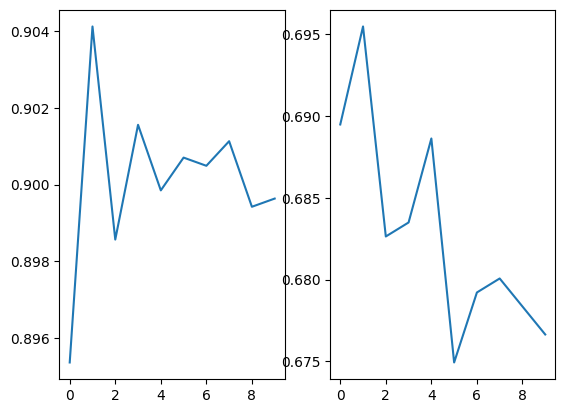

In [44]:
dev,(harsh1,harsh2)=matplotlib.pyplot.subplots(1,2)
harsh1.plot(history.history['accuracy'])
harsh2.plot(history.history['val_accuracy'])

**data is somewhere overfitting**

we can improve this particular model by
  1>. adding more dense layers
  2>. altering the optimizer
  3>. using callbacks
  4>. alterning the learning rate(by the help of learning rate
      scheduler)
  5>. by increasing the number of epochs
  

**Now using some predefined models**

In [37]:
import tensorflow_hub as hub

In [38]:
base_model=hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4')

In [48]:
model=tensorflow.keras.Sequential([
                                   tensorflow.keras.layers.Input(shape=[],dtype=tensorflow.string),
                                   base_model,
                                   tensorflow.keras.layers.Dense(3,activation='softmax')])

In [53]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=0.01),loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [54]:
history=model.fit(xtrain,ytrain,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
147/147 [==============================] - 4s 19ms/step - loss: 0.7268 - accuracy: 0.6921 - val_loss: 0.6975 - val_accuracy: 0.7006
Epoch 2/20
147/147 [==============================] - 3s 22ms/step - loss: 0.7188 - accuracy: 0.6940 - val_loss: 0.6915 - val_accuracy: 0.7040
Epoch 3/20
147/147 [==============================] - 2s 15ms/step - loss: 0.7123 - accuracy: 0.6972 - val_loss: 0.6861 - val_accuracy: 0.7032
Epoch 4/20
147/147 [==============================] - 2s 15ms/step - loss: 0.7066 - accuracy: 0.6974 - val_loss: 0.6816 - val_accuracy: 0.7049
Epoch 5/20
147/147 [==============================] - 2s 15ms/step - loss: 0.7020 - accuracy: 0.6987 - val_loss: 0.6780 - val_accuracy: 0.7032
Epoch 6/20
147/147 [==============================] - 2s 15ms/step - loss: 0.6978 - accuracy: 0.6989 - val_loss: 0.6750 - val_accuracy: 0.7040
Epoch 7/20
147/147 [==============================] - 3s 18ms/step - loss: 0.6944 - accuracy: 0.7004 - val_loss: 0.6726 - val_accuracy: 0.7032

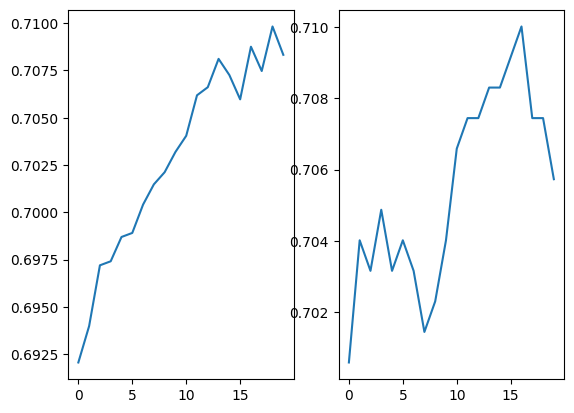

In [55]:
dev,(harsh1,harsh2)=matplotlib.pyplot.subplots(1,2)
harsh1.plot(history.history['accuracy'])
harsh2.plot(history.history['val_accuracy'])

**we have removed the overfitting .We can still improve the model's performance**